In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import metrics 
%matplotlib inline

In [27]:
# Load input data 
X = np.loadtxt('data-clustering.txt', delimiter=',') 


In [23]:
num_clusters = 5

([], <a list of 0 Text yticklabel objects>)

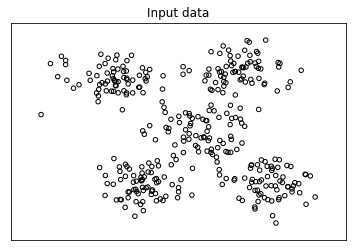

In [24]:
# Plot input data 
plt.figure() 
plt.scatter(X[:,0], X[:,1], marker='.', facecolors='none',  
        edgecolors='black', s=80) 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
plt.title('Input data') 
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(())

In [9]:
# Create KMeans object  
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10) 

In [10]:
# Train the KMeans clustering model 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
step_size = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size)) 

In [28]:
np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

[array([[-1.4 , -1.39, -1.38, ...,  9.6 ,  9.61,  9.62],
        [-1.4 , -1.39, -1.38, ...,  9.6 ,  9.61,  9.62],
        [-1.4 , -1.39, -1.38, ...,  9.6 ,  9.61,  9.62],
        ..., 
        [-1.4 , -1.39, -1.38, ...,  9.6 ,  9.61,  9.62],
        [-1.4 , -1.39, -1.38, ...,  9.6 ,  9.61,  9.62],
        [-1.4 , -1.39, -1.38, ...,  9.6 ,  9.61,  9.62]]),
 array([[ -1.29,  -1.29,  -1.29, ...,  -1.29,  -1.29,  -1.29],
        [ -1.28,  -1.28,  -1.28, ...,  -1.28,  -1.28,  -1.28],
        [ -1.27,  -1.27,  -1.27, ...,  -1.27,  -1.27,  -1.27],
        ..., 
        [ 11.29,  11.29,  11.29, ...,  11.29,  11.29,  11.29],
        [ 11.3 ,  11.3 ,  11.3 , ...,  11.3 ,  11.3 ,  11.3 ],
        [ 11.31,  11.31,  11.31, ...,  11.31,  11.31,  11.31]])]

In [13]:
# Predict output labels for all the points on the grid  
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()]) 

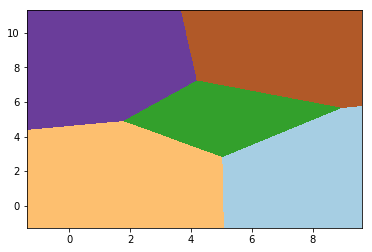

In [14]:
# Plot different regions and color them  
output = output.reshape(x_vals.shape) 
plt.figure() 
plt.clf() 
plt.imshow(output, interpolation='nearest', 
           extent=(x_vals.min(), x_vals.max(),  
               y_vals.min(), y_vals.max()), 
           cmap=plt.cm.Paired,  
           aspect='auto',  
           origin='lower') 

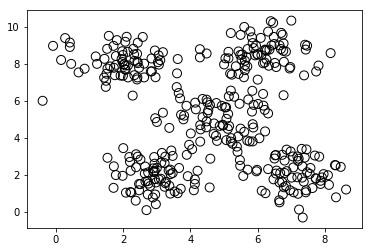

In [15]:
# Overlay input points 
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',  
        edgecolors='black', s=80) 

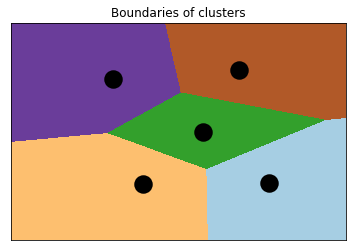

In [21]:

output = output.reshape(x_vals.shape) 
plt.figure() 
plt.clf() 
plt.imshow(output, interpolation='nearest', 
           extent=(x_vals.min(), x_vals.max(),  
               y_vals.min(), y_vals.max()), 
           cmap=plt.cm.Paired,  
           aspect='auto',  
           origin='lower') 

# Plot the centers of clusters 
cluster_centers = kmeans.cluster_centers_ 
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],  
        marker='o', s=210, linewidths=4, color='black',  
        zorder=12, facecolors='black') 
 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
plt.title('Boundaries of clusters') 
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show() 

In [30]:
a,b = np.meshgrid([1,2,3],[4,5,6])

In [36]:
np.c_[a.ravel(),b.ravel()]

array([[1, 4],
       [2, 4],
       [3, 4],
       [1, 5],
       [2, 5],
       [3, 5],
       [1, 6],
       [2, 6],
       [3, 6]])

In [32]:
a

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [37]:
output

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ..., 
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4]])